# Data Science Intern at LetsGrowMore
Author - Nancy

Task-2: Stock Market Prediction And Forecasting Using Stacked LSTM

Level : Beginner

Language-Python

Software-Jupyter Notebook

## Importing the necessary libraries

In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [100]:
df = pd.read_csv("stock_data.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [101]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [102]:
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
import numpy as np
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [104]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [105]:
len(df)

2035

In [106]:
df_close = df['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [107]:
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [108]:
df.reset_index(inplace=True)

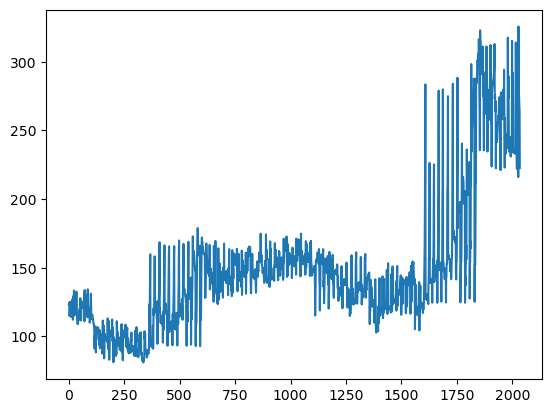

In [109]:
plt.plot(df['Close'])

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))


#Because we are going to make prediction on th basis of closing price
close_price = df["Close"]

close_price = np.array(close_price).reshape(-1 , 1)


transformed_closed_value =  scaler.fit_transform(close_price)

df = transformed_closed_value

df.shape

(2035, 1)

In [111]:
print(df)

[[0.17177288]
 [0.17381536]
 [0.17810458]
 ...
 [0.76245915]
 [0.75265523]
 [0.57883987]]


## Splitting the data into train and test sets

In [112]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [113]:
training_size,test_size

(1322, 713)

In [114]:
train_data

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.2183415 ],
       [0.2318219 ],
       [0.17279412]])

In [115]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [116]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [117]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [118]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [119]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Create the Stacked LSTM model

In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [121]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
18/18 [==============================] - 15s 331ms/step - loss: 0.0111 - val_loss: 0.0016
Epoch 2/60
18/18 [==============================] - 5s 304ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 3/60
18/18 [==============================] - 4s 228ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 4/60
18/18 [==============================] - 3s 178ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 5/60
18/18 [==============================] - 4s 250ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 6/60
18/18 [==============================] - 6s 309ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 7/60
18/18 [==============================] - 4s 196ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 8/60
18/18 [==============================] - 4s 198ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 9/60
18/18 [==============================] - 5s 299ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 10/60
18/18 [==============================] - 5s 280ms/step - loss: 0.0027 - val_loss: 0.001

### Making predictions

In [132]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 73ms/step


In [133]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model Evaluation
#### Calculating RMSE performance metrics

In [134]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

133.14963524010378

In [135]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

180.67282759887976

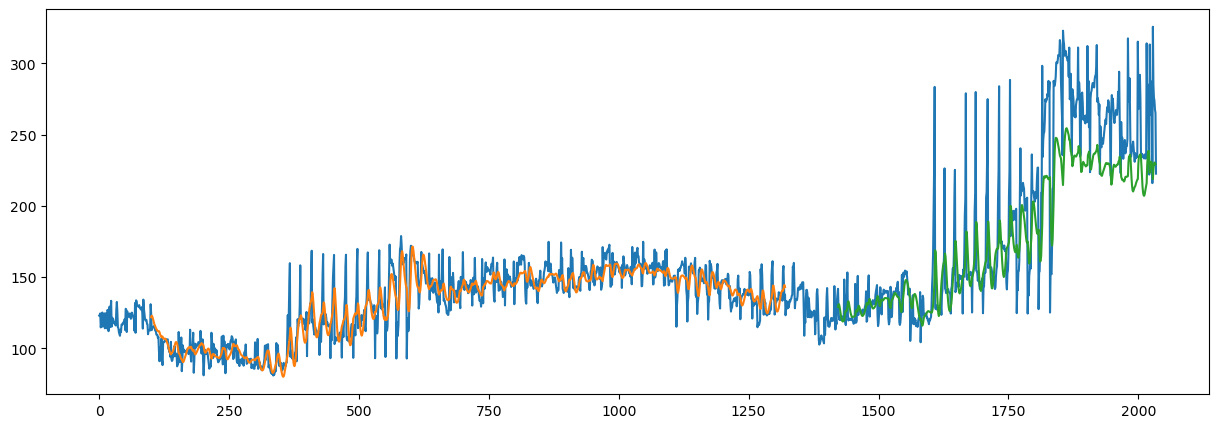

In [136]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Making predictions for next 30 days

In [137]:
len(test_data), X_test.shape

(713, (612, 100, 1))

In [138]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 304)

In [139]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [141]:
from numpy import array

lst_output = []
n_steps = 303
nextNumberOfDays = 30
i = 0

while i < nextNumberOfDays:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0][0]))
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
    i += 1

print(lst_output)


0 day input [0.82945261 0.38582516 0.3809232  0.39236111 0.37908497 0.38480392
 0.3690768  0.37275327 0.36376634 0.36846405 0.37275327 0.35723039
 0.36029412 0.3619281  0.26633987 0.24693627 0.29268791 0.30085784
 0.34742647 0.51450163 0.58639706 0.84763072 0.3995098  0.46119281
 0.44791667 0.46343954 0.47058824 0.44485294 0.47222222 0.4628268
 0.45894608 0.44689542 0.47426471 0.47814542 0.17892157 0.25714869
 0.24448529 0.29861111 0.30004085 0.3314951  0.52022059 0.65155229
 0.51613562 0.53553922 0.52941176 0.54064542 0.55249183 0.54227941
 0.53615196 0.49101307 0.47263072 0.50531046 0.48059641 0.49918301
 0.51000817 0.17769608 0.25735294 0.22937092 0.28594771 0.30187908
 0.3496732  0.3065768  0.52083333 0.63398693 0.52818627 0.52553105
 0.52839052 0.51409314 0.50510621 0.49897876 0.52573529 0.50796569
 0.52634804 0.57005719 0.59579248 0.59640523 0.19035948 0.29595588
 0.29840686 0.36172386 0.34007353 0.52410131 0.52471405 0.8880719
 0.62683824 0.67708333 0.6942402  0.69852941 0.73100

2 day output [[0.5339848]]
3 day input [0.39236111 0.37908497 0.38480392 0.3690768  0.37275327 0.36376634
 0.36846405 0.37275327 0.35723039 0.36029412 0.3619281  0.26633987
 0.24693627 0.29268791 0.30085784 0.34742647 0.51450163 0.58639706
 0.84763072 0.3995098  0.46119281 0.44791667 0.46343954 0.47058824
 0.44485294 0.47222222 0.4628268  0.45894608 0.44689542 0.47426471
 0.47814542 0.17892157 0.25714869 0.24448529 0.29861111 0.30004085
 0.3314951  0.52022059 0.65155229 0.51613562 0.53553922 0.52941176
 0.54064542 0.55249183 0.54227941 0.53615196 0.49101307 0.47263072
 0.50531046 0.48059641 0.49918301 0.51000817 0.17769608 0.25735294
 0.22937092 0.28594771 0.30187908 0.3496732  0.3065768  0.52083333
 0.63398693 0.52818627 0.52553105 0.52839052 0.51409314 0.50510621
 0.49897876 0.52573529 0.50796569 0.52634804 0.57005719 0.59579248
 0.59640523 0.19035948 0.29595588 0.29840686 0.36172386 0.34007353
 0.52410131 0.52471405 0.8880719  0.62683824 0.67708333 0.6942402
 0.69852941 0.7310049  0

6 day output [[0.5180727]]
7 day input [0.37275327 0.36376634 0.36846405 0.37275327 0.35723039 0.36029412
 0.3619281  0.26633987 0.24693627 0.29268791 0.30085784 0.34742647
 0.51450163 0.58639706 0.84763072 0.3995098  0.46119281 0.44791667
 0.46343954 0.47058824 0.44485294 0.47222222 0.4628268  0.45894608
 0.44689542 0.47426471 0.47814542 0.17892157 0.25714869 0.24448529
 0.29861111 0.30004085 0.3314951  0.52022059 0.65155229 0.51613562
 0.53553922 0.52941176 0.54064542 0.55249183 0.54227941 0.53615196
 0.49101307 0.47263072 0.50531046 0.48059641 0.49918301 0.51000817
 0.17769608 0.25735294 0.22937092 0.28594771 0.30187908 0.3496732
 0.3065768  0.52083333 0.63398693 0.52818627 0.52553105 0.52839052
 0.51409314 0.50510621 0.49897876 0.52573529 0.50796569 0.52634804
 0.57005719 0.59579248 0.59640523 0.19035948 0.29595588 0.29840686
 0.36172386 0.34007353 0.52410131 0.52471405 0.8880719  0.62683824
 0.67708333 0.6942402  0.69852941 0.7310049  0.79227941 0.78513072
 0.78880719 0.79187092 0

10 day output [[0.533741]]
11 day input [0.35723039 0.36029412 0.3619281  0.26633987 0.24693627 0.29268791
 0.30085784 0.34742647 0.51450163 0.58639706 0.84763072 0.3995098
 0.46119281 0.44791667 0.46343954 0.47058824 0.44485294 0.47222222
 0.4628268  0.45894608 0.44689542 0.47426471 0.47814542 0.17892157
 0.25714869 0.24448529 0.29861111 0.30004085 0.3314951  0.52022059
 0.65155229 0.51613562 0.53553922 0.52941176 0.54064542 0.55249183
 0.54227941 0.53615196 0.49101307 0.47263072 0.50531046 0.48059641
 0.49918301 0.51000817 0.17769608 0.25735294 0.22937092 0.28594771
 0.30187908 0.3496732  0.3065768  0.52083333 0.63398693 0.52818627
 0.52553105 0.52839052 0.51409314 0.50510621 0.49897876 0.52573529
 0.50796569 0.52634804 0.57005719 0.59579248 0.59640523 0.19035948
 0.29595588 0.29840686 0.36172386 0.34007353 0.52410131 0.52471405
 0.8880719  0.62683824 0.67708333 0.6942402  0.69852941 0.7310049
 0.79227941 0.78513072 0.78880719 0.79187092 0.80780229 0.80269608
 0.84477124 0.81392974 0

14 day output [[0.5165659]]
15 day input [0.24693627 0.29268791 0.30085784 0.34742647 0.51450163 0.58639706
 0.84763072 0.3995098  0.46119281 0.44791667 0.46343954 0.47058824
 0.44485294 0.47222222 0.4628268  0.45894608 0.44689542 0.47426471
 0.47814542 0.17892157 0.25714869 0.24448529 0.29861111 0.30004085
 0.3314951  0.52022059 0.65155229 0.51613562 0.53553922 0.52941176
 0.54064542 0.55249183 0.54227941 0.53615196 0.49101307 0.47263072
 0.50531046 0.48059641 0.49918301 0.51000817 0.17769608 0.25735294
 0.22937092 0.28594771 0.30187908 0.3496732  0.3065768  0.52083333
 0.63398693 0.52818627 0.52553105 0.52839052 0.51409314 0.50510621
 0.49897876 0.52573529 0.50796569 0.52634804 0.57005719 0.59579248
 0.59640523 0.19035948 0.29595588 0.29840686 0.36172386 0.34007353
 0.52410131 0.52471405 0.8880719  0.62683824 0.67708333 0.6942402
 0.69852941 0.7310049  0.79227941 0.78513072 0.78880719 0.79187092
 0.80780229 0.80269608 0.84477124 0.81392974 0.84211601 0.18055556
 0.28921569 0.29289216

18 day output [[0.46957877]]
19 day input [0.51450163 0.58639706 0.84763072 0.3995098  0.46119281 0.44791667
 0.46343954 0.47058824 0.44485294 0.47222222 0.4628268  0.45894608
 0.44689542 0.47426471 0.47814542 0.17892157 0.25714869 0.24448529
 0.29861111 0.30004085 0.3314951  0.52022059 0.65155229 0.51613562
 0.53553922 0.52941176 0.54064542 0.55249183 0.54227941 0.53615196
 0.49101307 0.47263072 0.50531046 0.48059641 0.49918301 0.51000817
 0.17769608 0.25735294 0.22937092 0.28594771 0.30187908 0.3496732
 0.3065768  0.52083333 0.63398693 0.52818627 0.52553105 0.52839052
 0.51409314 0.50510621 0.49897876 0.52573529 0.50796569 0.52634804
 0.57005719 0.59579248 0.59640523 0.19035948 0.29595588 0.29840686
 0.36172386 0.34007353 0.52410131 0.52471405 0.8880719  0.62683824
 0.67708333 0.6942402  0.69852941 0.7310049  0.79227941 0.78513072
 0.78880719 0.79187092 0.80780229 0.80269608 0.84477124 0.81392974
 0.84211601 0.18055556 0.28921569 0.29289216 0.29064542 0.37908497
 0.53553922 0.5353349

22 day output [[0.42392683]]
23 day input [0.46119281 0.44791667 0.46343954 0.47058824 0.44485294 0.47222222
 0.4628268  0.45894608 0.44689542 0.47426471 0.47814542 0.17892157
 0.25714869 0.24448529 0.29861111 0.30004085 0.3314951  0.52022059
 0.65155229 0.51613562 0.53553922 0.52941176 0.54064542 0.55249183
 0.54227941 0.53615196 0.49101307 0.47263072 0.50531046 0.48059641
 0.49918301 0.51000817 0.17769608 0.25735294 0.22937092 0.28594771
 0.30187908 0.3496732  0.3065768  0.52083333 0.63398693 0.52818627
 0.52553105 0.52839052 0.51409314 0.50510621 0.49897876 0.52573529
 0.50796569 0.52634804 0.57005719 0.59579248 0.59640523 0.19035948
 0.29595588 0.29840686 0.36172386 0.34007353 0.52410131 0.52471405
 0.8880719  0.62683824 0.67708333 0.6942402  0.69852941 0.7310049
 0.79227941 0.78513072 0.78880719 0.79187092 0.80780229 0.80269608
 0.84477124 0.81392974 0.84211601 0.18055556 0.28921569 0.29289216
 0.29064542 0.37908497 0.53553922 0.53533497 0.84497549 0.83129085
 0.8306781  0.8410947

26 day output [[0.40752098]]
27 day input [0.44485294 0.47222222 0.4628268  0.45894608 0.44689542 0.47426471
 0.47814542 0.17892157 0.25714869 0.24448529 0.29861111 0.30004085
 0.3314951  0.52022059 0.65155229 0.51613562 0.53553922 0.52941176
 0.54064542 0.55249183 0.54227941 0.53615196 0.49101307 0.47263072
 0.50531046 0.48059641 0.49918301 0.51000817 0.17769608 0.25735294
 0.22937092 0.28594771 0.30187908 0.3496732  0.3065768  0.52083333
 0.63398693 0.52818627 0.52553105 0.52839052 0.51409314 0.50510621
 0.49897876 0.52573529 0.50796569 0.52634804 0.57005719 0.59579248
 0.59640523 0.19035948 0.29595588 0.29840686 0.36172386 0.34007353
 0.52410131 0.52471405 0.8880719  0.62683824 0.67708333 0.6942402
 0.69852941 0.7310049  0.79227941 0.78513072 0.78880719 0.79187092
 0.80780229 0.80269608 0.84477124 0.81392974 0.84211601 0.18055556
 0.28921569 0.29289216 0.29064542 0.37908497 0.53553922 0.53533497
 0.84497549 0.83129085 0.8306781  0.84109477 0.85743464 0.89746732
 0.89828431 0.8954248

In [142]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)    

In [143]:
day_new.shape

(100,)

In [144]:
day_pred.shape

(30,)

In [146]:
data_new = df.tolist()
data_new.extend(lst_output)

In [147]:
len(df)

2035

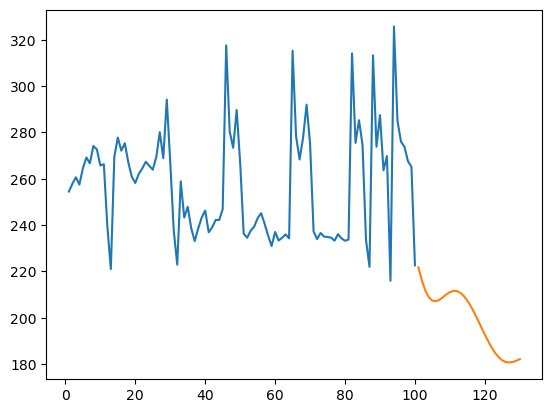

In [149]:
plt.plot(day_new, scaler.inverse_transform(df[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

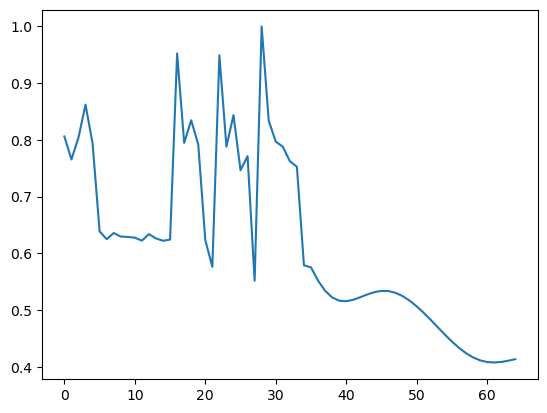

In [151]:
data_new = df.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [153]:
data_new = scaler.inverse_transform(df).tolist()

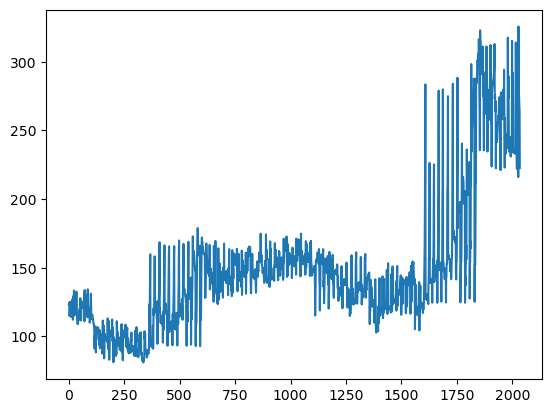

In [154]:
plt.plot(data_new)

# Thank You!